## Importing modules

In [1]:
import statistics
import math
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Load the data

In [2]:
path = '/Users/koendereus/Desktop/session5/'

In [5]:
results = pd.read_csv(os.path.join(path, 'results_lexical_decision.csv'))
results.rename(columns = {'Unnamed: 0': 'trial_order'}, inplace = True)

# Create a list of conditions
conditions = [
    results['trial'].str.startswith('NW'),
    results['trial'].str.startswith('LF'),
    results['trial'].str.startswith('HF')
]

# Create a list of values we want to assign to each condition
values = ['NW', 'LF', 'HF']

# Create a new column and assign values to the conditions
results['condition'] = np.select(conditions, values)

results

,trial_order,trial,key,start_time,end_time,reaction_time,condition
0,0,NW/gefaapt_audio,m,4.166534,4.923606,0.757072,NW
1,1,NW/kijs_audio,z,5.449053,6.124190,0.675138,NW
2,2,NW/kwarp_audio,m,6.650039,7.330301,0.680262,NW
3,3,HF/juist_audio,z,7.866306,8.563310,0.697004,HF
4,4,LF/imams_audio,m,9.098430,9.916196,0.817766,LF
...,...,...,...,...,...,...,...
195,195,NW/mijk_audio,m,229.548960,230.122749,0.573790,NW
196,196,LF/lanen_audio,z,230.641325,231.339840,0.698515,LF
197,197,NW/brum_audio,m,231.856839,232.396600,0.539761,NW
198,198,HF/zoek_audio,z,232.914624,233.446440,0.531817,HF


## Exploration

In [6]:
# Produce a summary table

summary = results.groupby(by = 'condition').aggregate(
    mean_RT = pd.NamedAgg('reaction_time', np.mean),
    std_RT = pd.NamedAgg('reaction_time', np.std)
)

summary.reset_index(inplace=True)
print(summary)

  condition   mean_RT    std_RT
0        HF  0.609699  0.118456
1        LF  0.645378  0.151653
2        NW  0.634025  0.167942


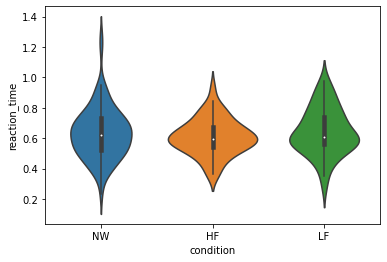

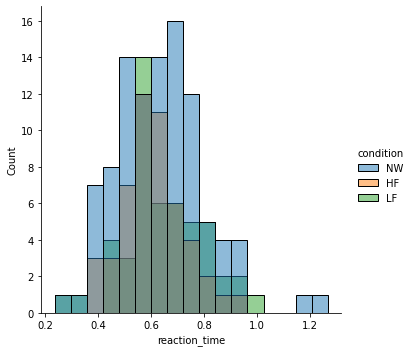

In [8]:
# Produce violin plot and histogram
sns.violinplot(x = 'condition', y = 'reaction_time', data = results)
sns.displot(results, x = 'reaction_time', hue = 'condition')

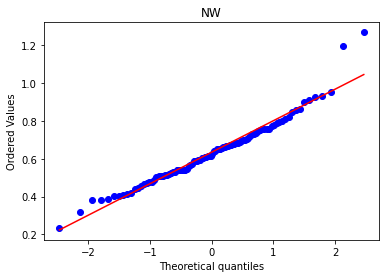

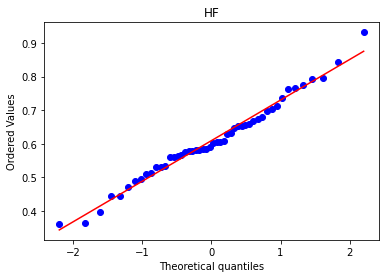

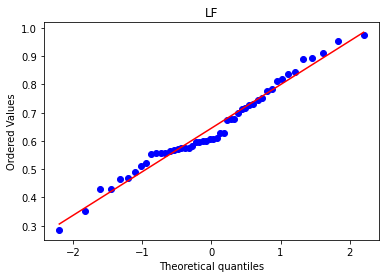

In [9]:
# QQ plot

for condition in ['NW', 'HF', 'LF']:
    plot = stats.probplot(results.loc[results['condition'] == condition, 'reaction_time'], plot = plt)
    plt.title(str(condition))
    plt.show()

## T-test

In [13]:
hf_words = results.loc[results['condition'] == 'HF', 'reaction_time']
lf_words = results.loc[results['condition'] == 'LF', 'reaction_time']

print(stats.ttest_rel(hf_words, lf_words, nan_policy = 'raise'))

Ttest_relResult(statistic=-1.3147552439308545, pvalue=0.19471264416986414)


## Linear Mixed Model

In [14]:
import statsmodels.formula.api as smf

In [18]:
lmm = smf.mixedlm('reaction_time ~ condition', results, groups = 'key', re_formula = '1')
lmmf = lmm.fit()

lmmf.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:            MixedLM Dependent Variable: reaction_time
No. Observations: 200     Method:             REML         
No. Groups:       2       Scale:              0.0234       
Min. group size:  89      Log-Likelihood:     84.1892      
Max. group size:  111     Converged:          Yes          
Mean group size:  100.0                                    
-----------------------------------------------------------
                  Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.610    0.022 28.002 0.000  0.567  0.652
condition[T.LF]   0.036    0.031  1.160 0.246 -0.025  0.096
condition[T.NW]   0.024    0.027  0.912 0.362 -0.028  0.077
key Var           0.000    0.002                           
===========================================================

"""